In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

In [108]:
df = pd.read_csv("Twitter Sentiments.csv")

In [109]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [111]:
def remove_pattern(input_txt, pattern):
    r= re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word,"", input_txt)
    return input_txt

In [112]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [113]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [114]:
df["clean_tweet"] = df["clean_tweet"].str.replace("[^a-zA-Z#]", " ")

C:\Users\Lokesh hb\AppData\Local\Temp\ipykernel_2696\2550148735.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["clean_tweet"] = df["clean_tweet"].str.replace("[^a-zA-Z#]", " ")


In [115]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...


In [116]:
df["clean_tweet"] = df["clean_tweet"].apply(lambda x : " ".join([w for w in x.split() if len(w)>3]))

In [117]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap herself mantl...
31959,31960,0,listening to sad songs on a monday morning otw...,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemns


In [118]:
tokenize = df['clean_tweet'].apply(lambda x: x.split())

In [119]:
tokenize

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [120]:
from nltk.stem.porter import PorterStemmer

In [121]:
stemmer = PorterStemmer()
stemmed1 = tokenize.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [122]:
stemmed1

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwav, tri, wrap, herself, man...
31959                   [listen, song, monday, morn, work]
31960    [#sikh, #templ, vandalis, #calgari, #wso, cond...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [123]:
for i in range(len(stemmed1)):
    stemmed1[i]= " ".join(stemmed1[i])

In [124]:
stemmed1

0        when father dysfunct selfish drag kid into dys...
1        thank #lyft credit caus they offer wheelchair ...
2                                      bihday your majesti
3                               #model love take with time
4                                 factsguid societi #motiv
                               ...                        
31957                                           that youuu
31958    nina turner airwav tri wrap herself mantl genu...
31959                         listen song monday morn work
31960          #sikh #templ vandalis #calgari #wso condemn
31961                                         thank follow
Name: clean_tweet, Length: 31962, dtype: object

In [ ]:
#Exploratory data aanalysis

In [128]:
all_words = " ".join([sentence for sentence in df["clean_tweet"]])

In [129]:
all_words

'when father dysfunctional selfish drags kids into dysfunction #run thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked bihday your majesty #model love take with time factsguide society #motivation huge fare talking before they leave chaos disputes when they there #allshowandnogo camping tomorrow danny next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl love land #allin #cavs #champions #cleveland #clevelandcavaliers welcome here #ireland consumer price index climbed from previous #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love daddy today days #gettingfed #cnn calls #michigan middle school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins ouch junior angry #got #junior #yugyoem #omg thankful having paner #thankful #positive retweet agree #fri

In [139]:
from wordcloud import WordCloud

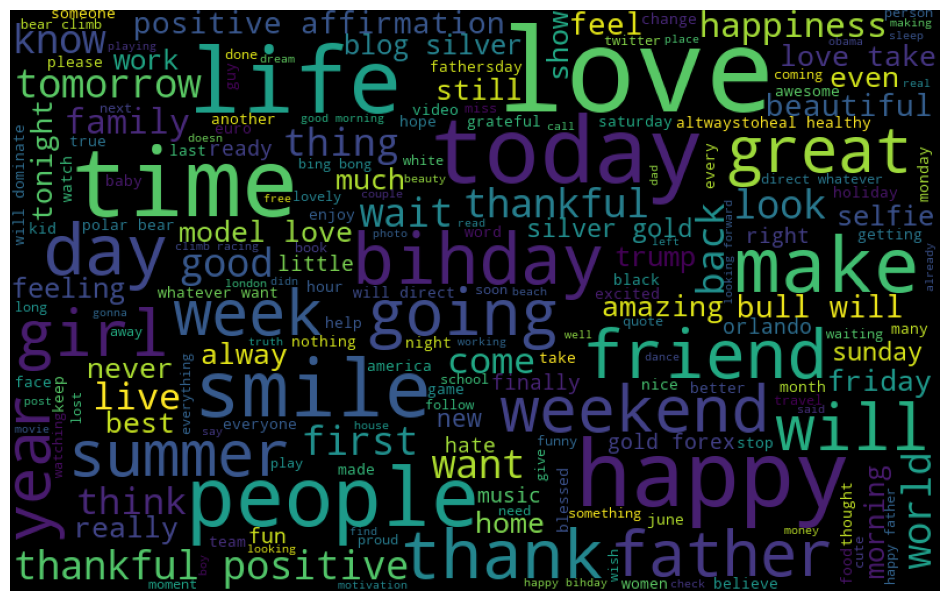

In [153]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size =100).generate(all_words)
plt.figure(figsize= (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

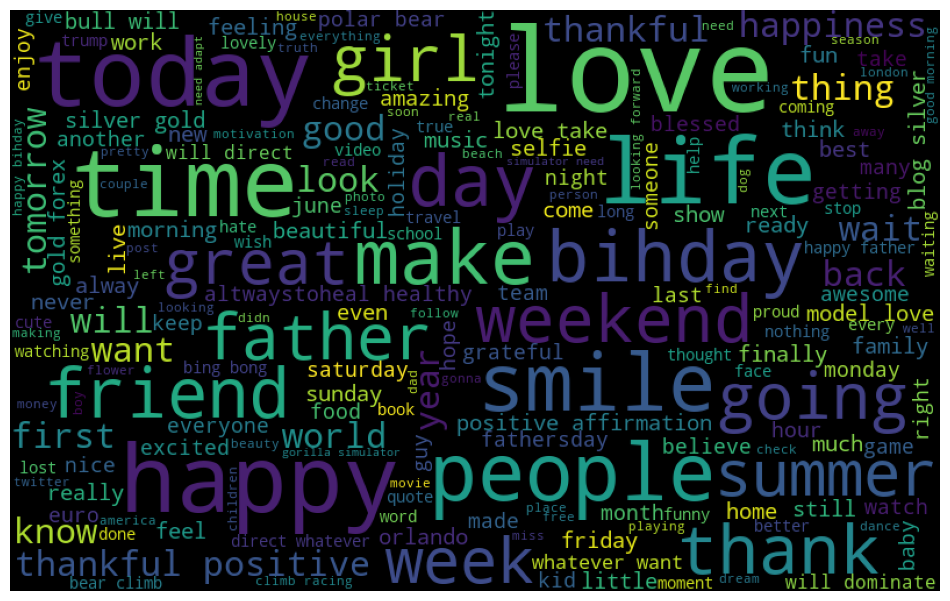

In [159]:
all_words1 = " ".join([sentence for sentence in df["clean_tweet"] [df["label"] == 0]])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size =100).generate(all_words1)
plt.figure(figsize= (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [177]:
def hasta(tweets):
    hastags =[]
    for tweet in tweets:
        hf = re.findall(r"#(\w+)", tweet)
        hastags.append(hf)
    return hastags

In [183]:
positive = hasta(df['clean_tweet'][df['label']== 0])

negtive = hasta(df['clean_tweet'][df['label']== 1])


In [184]:
positive= sum(positive, [])
negtive= sum(negtive, [])

In [185]:
positive

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 'gettingfed',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ri

In [199]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [195]:
vect= CountVectorizer(max_df = 0.90, min_df = 2, max_features =1000, stop_words = 'english')
bow =vect.fit_transform(df['clean_tweet'])

In [198]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [200]:
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state= 42, test_size =0.25)

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [207]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [209]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.4674046740467405

In [212]:
accuracy_score(y_test, pred)

0.9458140407958954